## Run gear experiment
#### Input gear metadata (at least gear number) and run experiment to add test data to dictionary

In [46]:
import os
import pickle
import numpy as np

from Experiment_Utils import Run_Experiment,  plot_dict_key

In [47]:
# FOR DEBUGGING - feel free to ignore.
%load_ext autoreload
%autoreload 2
from Experiment_Utils import Run_Experiment, plot_dict_key

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
file_dir = '/home/gmc/Python/Mod_DOE'
file_name = 'Taguchi_test_dict.pkl'
Experiment_Runtime = 5 #s
Num_Experiment = 6 # trials
Direction = False # start CW

In [49]:
# Set design number - FOR TAGUCHI DESIGNS
Gear_Design_Number = 16

In [50]:
os.chdir(file_dir)
try:
    starting_dict = pickle.load(open(file_name, 'rb'))
except:
    print('Making new dict')
    starting_dict = {}

In [51]:
print(f'Current gear number: {Gear_Design_Number}')
raise RuntimeError("MAKE SURE YOU UPDATED THE GEAR NUMBER!!")

Current gear number: 16


RuntimeError: MAKE SURE YOU UPDATED THE GEAR NUMBER!!

In [52]:
in_dict = starting_dict.copy()
in_key = 'Taguchi_Design_' + str(Gear_Design_Number)
for i in range(Num_Experiment):
    in_dict = Run_Experiment(in_dict, Experiment_Runtime, in_key, Direction)
    Direction = not Direction

Running motor CW for 5 seconds ...
Posting load vals, shape: 166
Posting current vals, shape: 100
Key does not exist, creating new key
Running motor CCW for 5 seconds ...
Position ERROR [TxRxResult] Incorrect status packet!
Posting load vals, shape: 173
Posting current vals, shape: 107
Key exists, appending
Running motor CW for 5 seconds ...
Posting current vals, shape: 111
Posting load vals, shape: 172
Key exists, appending
Running motor CCW for 5 seconds ...
Posting load vals, shape: 162
Posting current vals, shape: 129
Key exists, appending
Running motor CW for 5 seconds ...
Posting current vals, shape: 92
Posting load vals, shape: 159
Key exists, appending
Running motor CCW for 5 seconds ...
Posting load vals, shape: 165
Posting current vals, shape: 97
Key exists, appending


### We can view the data from the latest (nth) test

Taguchi_Design_16_test_fig


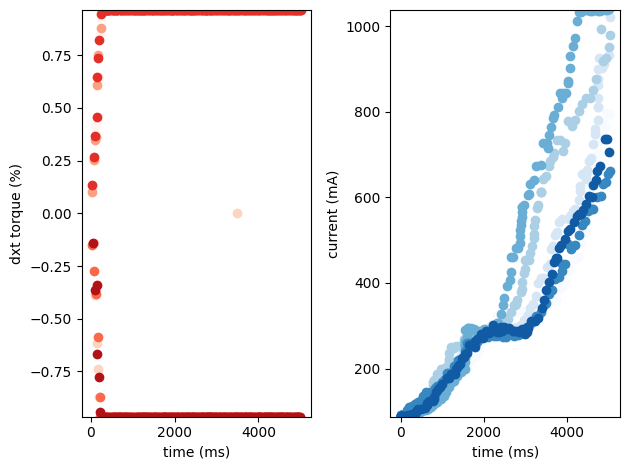

In [53]:
# load latest values
update_dict = in_dict # make sure plotted values are the ones updating
key = list(update_dict.keys())[-1]
# plot - TODO: pull the max torque/current vals from a function similar to plot_dict_key, pull design parameters from Taguchi .csv, create entry for Ax
save_to = '/home/gmc/Documents/Gear_Design'
pic_name = in_key + "_test_fig"
print(pic_name)
plot_dict_key(update_dict, key, save_loc = save_to, file_name = pic_name)

In [54]:
raise RuntimeError("MAKE SURE YOU WANT TO SAVE THIS DATA!!")

RuntimeError: MAKE SURE YOU WANT TO SAVE THIS DATA!!

In [55]:
os.chdir(file_dir)
pickle.dump(update_dict,open(file_name, 'wb'))